In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("random_edge_null_25_2_100.csv")

In [35]:
def summary_stats(df):
    """Returns a series of averages and stds indexed by edge count."""
    gb = df.groupby("edges")
    avg = gb.agg(np.average)
    err = gb.agg(np.std)
    return pd.Series(avg.perf, index = avg.index), pd.Series(err.perf, index = err.index)

In [37]:
avg, err = summary_stats(data)

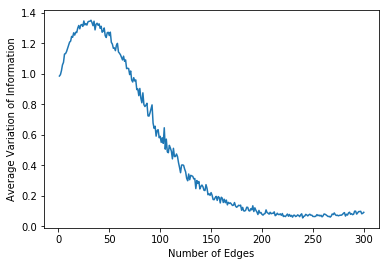

In [44]:
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

In [72]:
sw_data = pd.read_csv("small_world_null_25_0_2_100.csv")
sw_data["edges"] = sw_data["edges"] / 2 * 25

In [73]:
sw_data.head()

,edges,perf
0,25.0,1.488971
1,25.0,1.459747
2,25.0,1.110242
3,25.0,1.581952
4,25.0,1.435585


In [74]:
sw_avg, sw_err = summary_stats(sw_data)

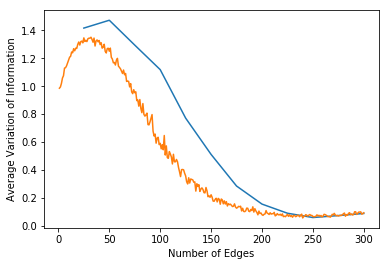

In [75]:
plt.plot(sw_avg.index, sw_avg)
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

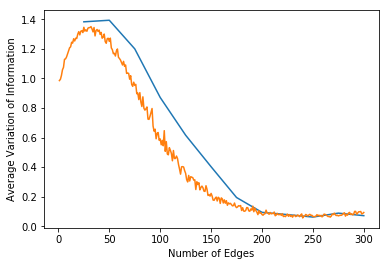

In [55]:
plt.plot(sw_avg.index, sw_avg)
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

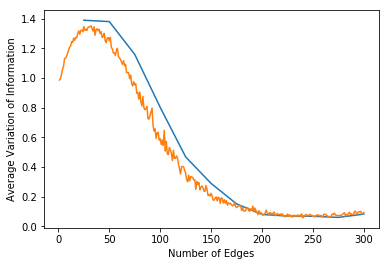

In [50]:
plt.plot(sw_avg.index, sw_avg)
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

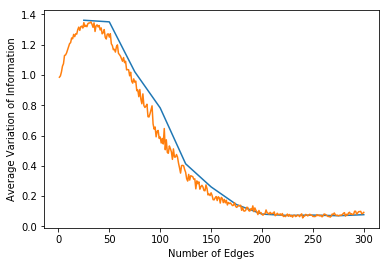

In [59]:
plt.plot(sw_avg.index, sw_avg)
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

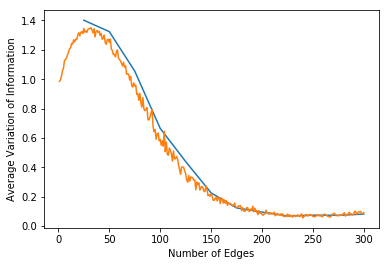

In [63]:
plt.plot(sw_avg.index, sw_avg)
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

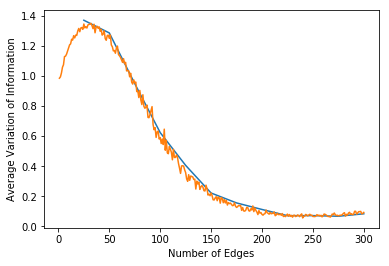

In [67]:
plt.plot(sw_avg.index, sw_avg)
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

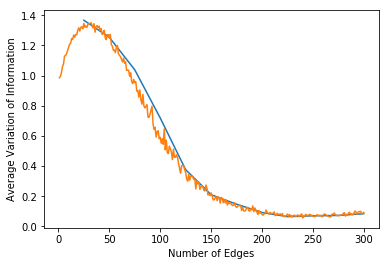

In [71]:
plt.plot(sw_avg.index, sw_avg)
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

In [85]:
#makes a list of all 150 edge perfs
lst = []
for i in range(len(data)):
    row = data.iloc[i]
    if row.edges == 151:
        lst.append(row.perf)


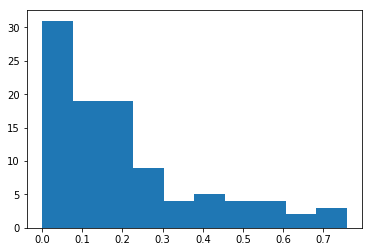

In [86]:
plt.hist(lst);

Weird, expected the dist to be normal, but it seems pretty right skewed. Wonder what it looks like for lower and higher edge vals.

In [92]:
#makes a list of all 150 edge perfs
lst2 = []
for i in range(len(data)):
    row = data.iloc[i]
    if row.edges == 50:
        lst2.append(row.perf)

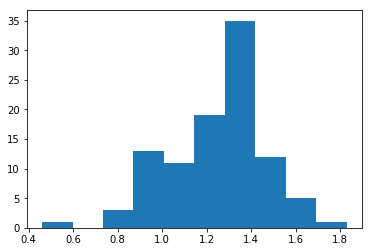

In [93]:
plt.hist(lst2);

In [94]:
#makes a list of all 150 edge perfs
lst3 = []
for i in range(len(data)):
    row = data.iloc[i]
    if row.edges == 250:
        lst3.append(row.perf)


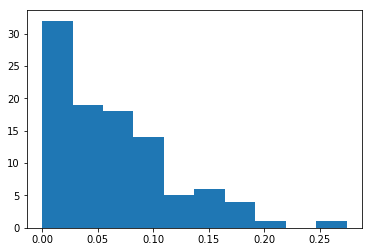

In [95]:
plt.hist(lst3);

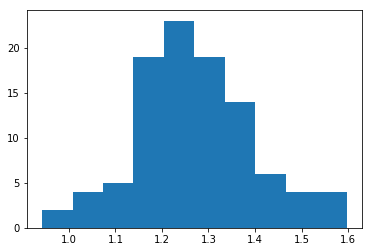

In [96]:
#makes a list of all 150 edge perfs
lst4 = []
for i in range(len(data)):
    row = data.iloc[i]
    if row.edges == 15:
        lst4.append(row.perf)
plt.hist(lst4);

1. Use MCMC to optimize a network for a certain pattern set.
    a. Could also prune the weak edges to get a sparse but efficient version of the graph.
2. Use basis patterns to go the other way. Could use the same MCMC idea to get good patterns.
3. Make the 2d dist to see how the slices look all together.
4. Scatter plot between variation of information vs the rand index to justify it.

In [101]:
pruned_data = pd.read_csv("pruned_hopfield_25_2_10.csv")

In [102]:
pruned_avg, pruned_err = summary_stats(pruned_data)

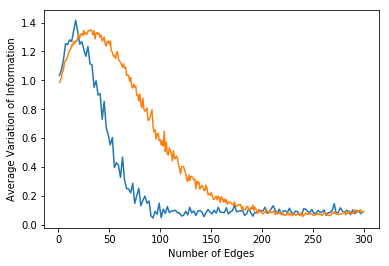

In [103]:
plt.plot(pruned_avg.index, pruned_avg)
plt.plot(avg.index, avg)
plt.xlabel("Number of Edges")
plt.ylabel("Average Variation of Information");

In [106]:
pruned_coeff_data = pd.read_csv("pruned_hopfield_match_coeff_100_10_100.csv")

In [108]:
pruned_coeff_data.head()

,in?,match_coeff,edge_weight
0,0,0.1,2
1,0,0.0,0
2,1,0.2,-4
3,0,0.1,2
4,0,0.1,2


In [109]:
random_coeff_data = pd.read_csv("random_edge_null_match_coeff_100_10_100.csv")
random_coeff_data.head()

,in?,match_coeff,edge_weight
0,0,0.1,-2
1,0,0.0,0
2,0,0.4,-8
3,0,0.0,0
4,0,0.2,-4


In [115]:
pruned_in_edges_match, pruned_in_edges_weight = [], []
pruned_out_edges_match, pruned_out_edges_weight = [], []
for i in range(len(pruned_coeff_data)):
    row = pruned_coeff_data.iloc[i]
    if row["in?"] == 0:
        pruned_out_edges_match.append(row["match_coeff"])
        pruned_out_edges_weight.append(row["edge_weight"])
    else:
        pruned_in_edges_match.append(row["match_coeff"])
        pruned_in_edges_weight.append(row["edge_weight"])

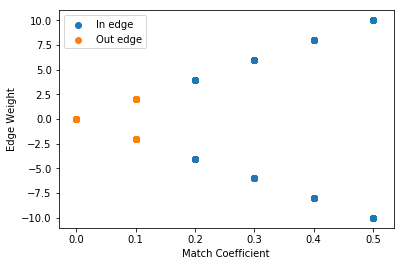

In [116]:
plt.scatter(pruned_in_edges_match, pruned_in_edges_weight, label = "In edge")
plt.scatter(pruned_out_edges_match, pruned_out_edges_weight, label = "Out edge")
plt.xlabel("Match Coefficient")
plt.ylabel("Edge Weight")
plt.legend()

In [117]:
random_in_edges_match, random_in_edges_weight = [], []
random_out_edges_match, random_out_edges_weight = [], []
for i in range(len(random_coeff_data)):
    row = random_coeff_data.iloc[i]
    if row["in?"] == 0:
        random_out_edges_match.append(row["match_coeff"])
        random_out_edges_weight.append(row["edge_weight"])
    else:
        random_in_edges_match.append(row["match_coeff"])
        random_in_edges_weight.append(row["edge_weight"])

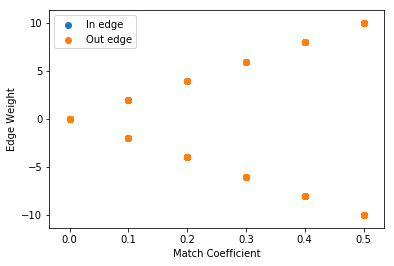

In [118]:
plt.scatter(random_in_edges_match, random_in_edges_weight, label = "In edge")
plt.scatter(random_out_edges_match, random_out_edges_weight, label = "Out edge")
plt.xlabel("Match Coefficient")
plt.ylabel("Edge Weight")
plt.legend()